In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Synthetic data for CU solution (1).xlsx")

In [3]:
data

,Sr.#,AT_01,AT_02,AT_03,AT_04,AT_05,AT_06,AT_07,AT_08,AT_09,AT_10,AT_11,AT_12,AT_13,AT_14,AT_15,AT_16,PD_Final
0,1,52,M,4,111000,83000,Business,NaN,5.0,155000,1,31000,2,36000.0,1477.0,106,388000,0.33
1,2,33,F,2,210000,32000,Salaried,1.0,NaN,184000,3,12000,5,49000.0,542.0,218,14000,0.37
2,3,38,F,3,272000,127000,Social Security,NaN,NaN,183000,3,122000,5,20000.0,310.0,13,247000,0.33
3,4,38,M,2,68000,39000,Social Security,NaN,NaN,139000,6,26000,0,NaN,NaN,221,443000,0.00
4,5,42,M,2,230000,206000,Business,NaN,7.0,155000,6,67000,0,NaN,NaN,143,321000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,45,M,2,281000,31000,Business,NaN,20.0,92000,3,16000,1,24000.0,1289.0,678,417000,0.37
4996,4997,33,M,3,478000,398000,Business,NaN,9.0,139000,4,322000,2,30000.0,1076.0,798,248000,0.45
4997,4998,74,F,4,82000,24000,Social Security,NaN,NaN,109000,6,20000,0,NaN,NaN,272,434000,0.00
4998,4999,74,M,3,19000,19000,Business,NaN,0.0,179000,7,7000,3,48000.0,724.0,334,497000,0.38


In [4]:
str1 = '''AT_01,Age
AT_02,Gender
AT_03,Number of dependents
AT_04,Networth
AT_05,Liquid Networth
AT_06,Source of income
AT_07,No. of years employed
AT_08,No. of years in business
AT_09,Income per month
AT_10,Number of checking accounts
AT_11,Total checking account bal.
AT_12,Number of existing credit lines
AT_13,Total outstanding in existing credit lines
AT_14,Total of existing EMI payments
AT_15,Credit bureau score
AT_16,Credit line being requested'''.splitlines()

clm_dct = {vl.split(",")[0]:vl.split(",")[1].replace(" ", "_") for vl in str1}
new_clm_nms = [clm_dct[cl] if cl in clm_dct.keys() else cl for cl in data.columns]
data.columns = new_clm_nms
data

,Sr.#,Age,Gender,Number_of_dependents,Networth,Liquid_Networth,Source_of_income,No._of_years_employed,No._of_years_in_business,Income_per_month,Number_of_checking_accounts,Total_checking_account_bal.,Number_of_existing_credit_lines,Total_outstanding_in_existing_credit_lines,Total_of_existing_EMI_payments,Credit_bureau_score,Credit_line_being_requested,PD_Final
0,1,52,M,4,111000,83000,Business,NaN,5.0,155000,1,31000,2,36000.0,1477.0,106,388000,0.33
1,2,33,F,2,210000,32000,Salaried,1.0,NaN,184000,3,12000,5,49000.0,542.0,218,14000,0.37
2,3,38,F,3,272000,127000,Social Security,NaN,NaN,183000,3,122000,5,20000.0,310.0,13,247000,0.33
3,4,38,M,2,68000,39000,Social Security,NaN,NaN,139000,6,26000,0,NaN,NaN,221,443000,0.00
4,5,42,M,2,230000,206000,Business,NaN,7.0,155000,6,67000,0,NaN,NaN,143,321000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,45,M,2,281000,31000,Business,NaN,20.0,92000,3,16000,1,24000.0,1289.0,678,417000,0.37
4996,4997,33,M,3,478000,398000,Business,NaN,9.0,139000,4,322000,2,30000.0,1076.0,798,248000,0.45
4997,4998,74,F,4,82000,24000,Social Security,NaN,NaN,109000,6,20000,0,NaN,NaN,272,434000,0.00
4998,4999,74,M,3,19000,19000,Business,NaN,0.0,179000,7,7000,3,48000.0,724.0,334,497000,0.38


### Checking Correlation

In [5]:
color = sns.color_palette("rocket_r")
sns.heatmap(data.corr(), cmap=color)
plt.show()

ValueError: could not convert string to float: 'M'

-> Negatively correlated with income per month: 
more the income is less will be the proability of default

-> Strong positive correlation with Total outstanding in existing credit lines: More the debt owed, more the proability of default

-> Positively correlated with Number of existing credit lines & Total of existing EMI payments

In [16]:
data.corr()

C:\Users\harinimohan.i.g\AppData\Local\Temp\ipykernel_49216\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sr.#,Age,Number_of_dependents,Networth,Liquid_Networth,No._of_years_employed,No._of_years_in_business,Income_per_month,Number_of_checking_accounts,Total_checking_account_bal.,Number_of_existing_credit_lines,Total_outstanding_in_existing_credit_lines,Total_of_existing_EMI_payments,Credit_bureau_score,Credit_line_being_requested,PD_Final
Sr.#,1.000000,-0.010189,-0.002689,0.001183,0.005295,-0.052145,0.014217,0.028230,0.035046,0.021341,0.006577,0.007852,0.018801,0.003755,0.030560,-0.005330
Age,-0.010189,1.000000,-0.009327,0.016377,0.013448,0.575820,0.584351,-0.030187,0.002265,0.003336,-0.021190,0.016272,0.003907,-0.005274,-0.001915,0.016357
Number_of_dependents,-0.002689,-0.009327,1.000000,-0.011456,-0.020243,-0.021189,0.033059,-0.011762,0.010482,-0.010504,-0.007342,0.009025,0.018057,0.018045,-0.018401,0.009505
Networth,0.001183,0.016377,-0.011456,1.000000,0.654533,-0.021294,-0.006457,-0.006969,-0.016513,0.491225,-0.032114,-0.011658,0.016227,-0.006046,0.003442,-0.019956
Liquid_Networth,0.005295,0.013448,-0.020243,0.654533,1.000000,0.016557,0.007750,0.014240,-0.029685,0.741789,-0.030127,-0.009706,-0.000584,-0.023569,-0.017703,-0.031988
No._of_years_employed,-0.052145,0.575820,-0.021189,-0.021294,0.016557,1.000000,NaN,-0.001088,-0.063279,0.021550,-0.036318,-0.004449,-0.020392,-0.022829,0.023571,-0.011661
No._of_years_in_business,0.014217,0.584351,0.033059,-0.006457,0.007750,NaN,1.000000,0.001294,-0.015164,0.006946,0.000078,-0.009651,0.001311,-0.016089,-0.031258,-0.012854
Income_per_month,0.028230,-0.030187,-0.011762,-0.006969,0.014240,-0.001088,0.001294,1.000000,0.003454,0.001955,-0.004506,-0.015821,-0.012364,0.013979,0.008497,-0.396128
Number_of_checking_accounts,0.035046,0.002265,0.010482,-0.016513,-0.029685,-0.063279,-0.015164,0.003454,1.000000,-0.009482,-0.002762,-0.023773,-0.015689,-0.022420,-0.023328,-0.025777
Total_checking_account_bal.,0.021341,0.003336,-0.010504,0.491225,0.741789,0.021550,0.006946,0.001955,-0.009482,1.000000,-0.020463,0.003583,-0.000670,-0.028361,-0.018482,-0.001637


<Axes: xlabel='PD_Final', ylabel='Income_per_month'>

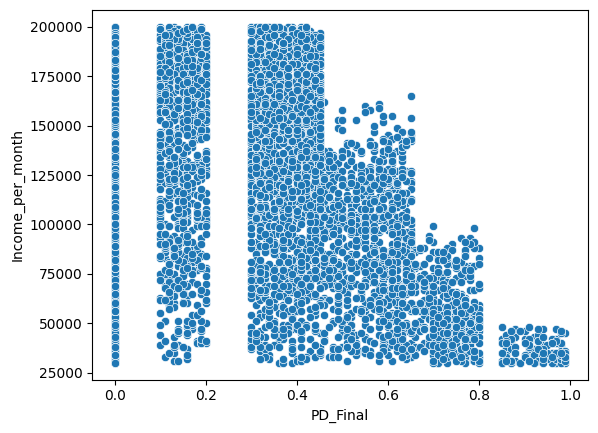

In [6]:
sns.scatterplot(data = data, x = 'PD_Final', y = 'Income_per_month')

### Preprocessing Data

In [7]:
# dropping AT_06 as labelled data not needed
data.drop(['Source_of_income'], axis=1, inplace=True)

In [8]:
# filling in no of years employed as 0 for self-employed people
data['No._of_years_employed'].fillna(0, inplace=True)

In [9]:
# filling in no of years in business as 0 for employed people
data['No._of_years_in_business'].fillna(0, inplace=True)

In [10]:
# similarly for existing credit debt + emi payments set to 0
data['Total_outstanding_in_existing_credit_lines'].fillna(0, inplace=True)
data['Total_of_existing_EMI_payments'].fillna(0, inplace=True)

In [11]:
data.drop(['Sr.#'], axis=1, inplace=True)

In [12]:
# one-hot encoding the m/f section
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Gender']]).toarray()
        column_names = ["Female","Male"] 
            
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]  
            
        return X

In [13]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("featureencoder", FeatureEncoder())])
data = pipeline.fit_transform(data)

In [14]:
data.drop(['Gender'], axis=1, inplace=True)

In [15]:
data.isnull().sum()

Age                                           0
Number_of_dependents                          0
Networth                                      0
Liquid_Networth                               0
No._of_years_employed                         0
No._of_years_in_business                      0
Income_per_month                              0
Number_of_checking_accounts                   0
Total_checking_account_bal.                   0
Number_of_existing_credit_lines               0
Total_outstanding_in_existing_credit_lines    0
Total_of_existing_EMI_payments                0
Credit_bureau_score                           0
Credit_line_being_requested                   0
PD_Final                                      0
Female                                        0
Male                                          0
dtype: int64

In [16]:
X = data.drop(columns=['PD_Final'])
y = data['PD_Final']
X

,Age,Number_of_dependents,Networth,Liquid_Networth,No._of_years_employed,No._of_years_in_business,Income_per_month,Number_of_checking_accounts,Total_checking_account_bal.,Number_of_existing_credit_lines,Total_outstanding_in_existing_credit_lines,Total_of_existing_EMI_payments,Credit_bureau_score,Credit_line_being_requested,Female,Male
0,52,4,111000,83000,0.0,5.0,155000,1,31000,2,36000.0,1477.0,106,388000,0.0,1.0
1,33,2,210000,32000,1.0,0.0,184000,3,12000,5,49000.0,542.0,218,14000,1.0,0.0
2,38,3,272000,127000,0.0,0.0,183000,3,122000,5,20000.0,310.0,13,247000,1.0,0.0
3,38,2,68000,39000,0.0,0.0,139000,6,26000,0,0.0,0.0,221,443000,0.0,1.0
4,42,2,230000,206000,0.0,7.0,155000,6,67000,0,0.0,0.0,143,321000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45,2,281000,31000,0.0,20.0,92000,3,16000,1,24000.0,1289.0,678,417000,0.0,1.0
4996,33,3,478000,398000,0.0,9.0,139000,4,322000,2,30000.0,1076.0,798,248000,0.0,1.0
4997,74,4,82000,24000,0.0,0.0,109000,6,20000,0,0.0,0.0,272,434000,1.0,0.0
4998,74,3,19000,19000,0.0,0.0,179000,7,7000,3,48000.0,724.0,334,497000,0.0,1.0


In [17]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [29]:
train_data = X_train.join(y_train)

In [30]:
train_data

,Age,Number_of_dependents,Networth,Liquid_Networth,No._of_years_employed,No._of_years_in_business,Income_per_month,Number_of_checking_accounts,Total_checking_account_bal.,Number_of_existing_credit_lines,Total_outstanding_in_existing_credit_lines,Total_of_existing_EMI_payments,Credit_bureau_score,Credit_line_being_requested,Female,Male,PD_Final
4558,33,4,101000,50000,0.0,0.0,123000,3,44000,4,38000.0,507.0,580,209000,0.0,1.0,0.54
2754,69,1,182000,96000,25.0,0.0,104000,4,93000,5,50000.0,774.0,248,181000,1.0,0.0,0.56
2833,31,4,178000,55000,0.0,0.0,171000,5,29000,4,34000.0,547.0,263,306000,1.0,0.0,0.37
1701,35,3,407000,24000,0.0,0.0,161000,8,15000,6,49000.0,375.0,100,234000,0.0,1.0,0.58
3053,65,3,314000,180000,0.0,41.0,146000,8,58000,3,39000.0,795.0,219,160000,1.0,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,54,4,60000,20000,25.0,0.0,178000,10,16000,7,44000.0,297.0,139,132000,1.0,0.0,0.32
942,64,4,333000,324000,17.0,0.0,116000,2,212000,2,43000.0,1166.0,338,263000,0.0,1.0,0.56
1013,58,3,192000,185000,0.0,30.0,104000,5,91000,4,45000.0,515.0,717,50000,0.0,1.0,0.64
4419,31,1,225000,24000,0.0,7.0,98000,3,9000,6,39000.0,485.0,535,331000,0.0,1.0,0.61


<Axes: >

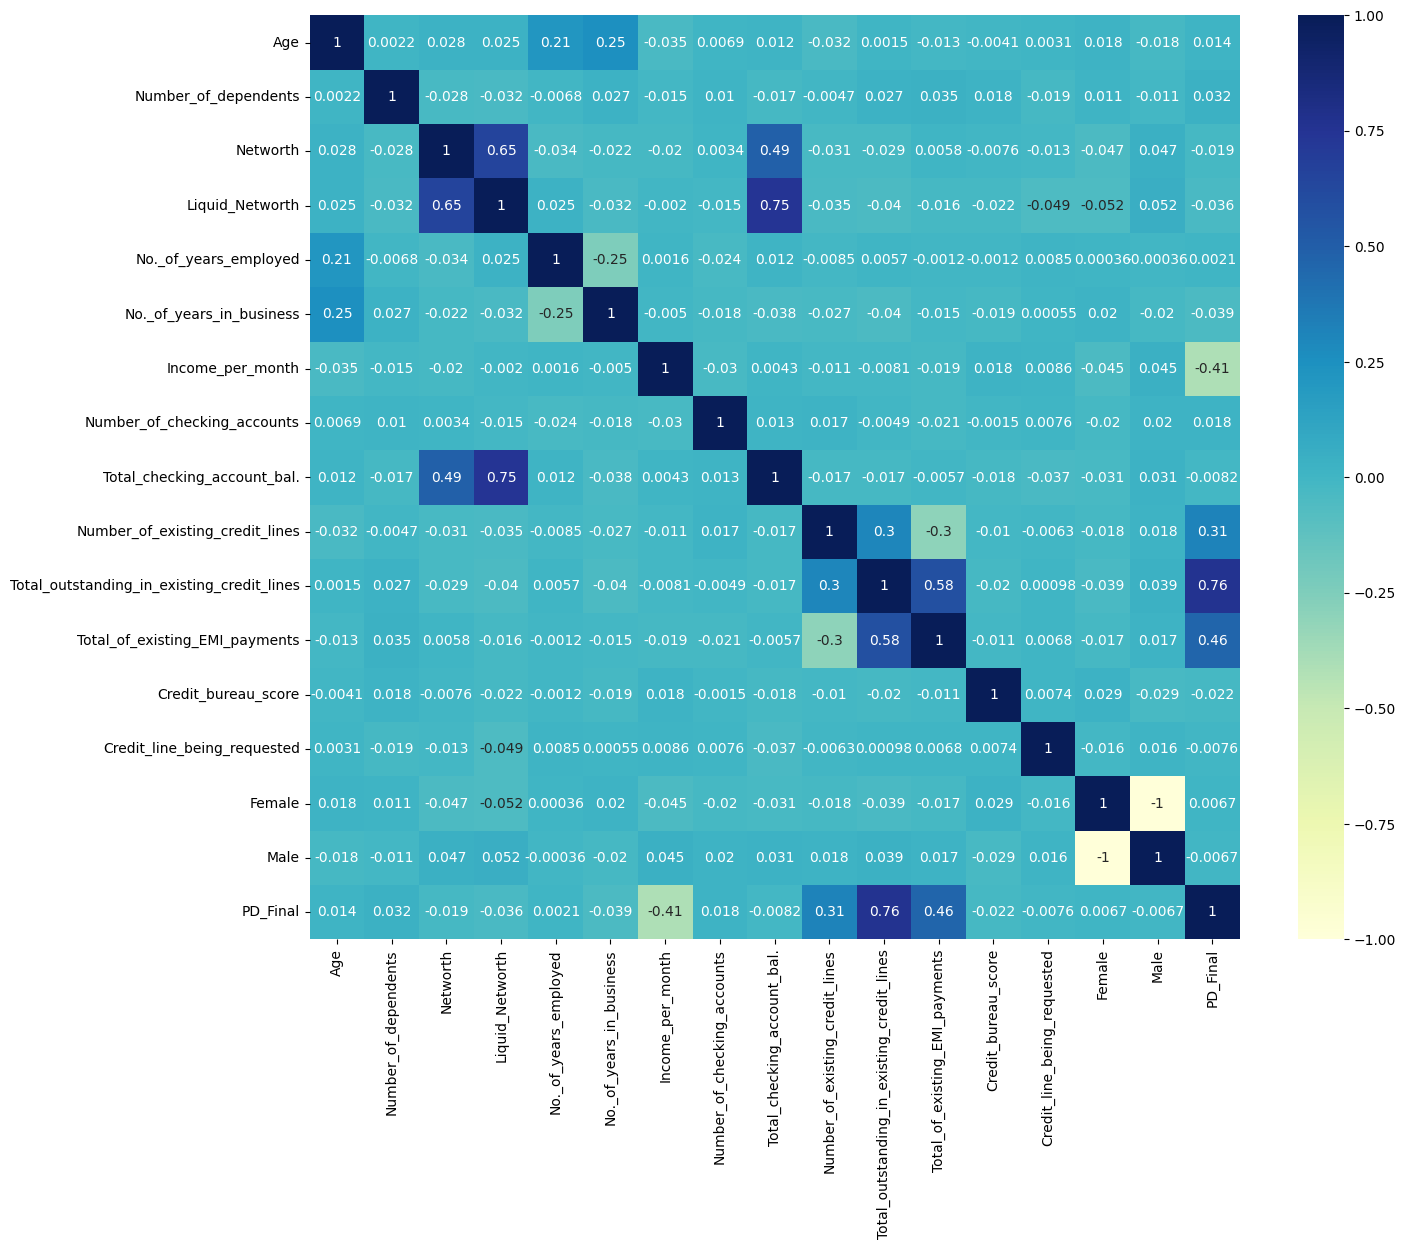

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number_of_dependents'}>,
        <Axes: title={'center': 'Networth'}>,
        <Axes: title={'center': 'Liquid_Networth'}>],
       [<Axes: title={'center': 'No._of_years_employed'}>,
        <Axes: title={'center': 'No._of_years_in_business'}>,
        <Axes: title={'center': 'Income_per_month'}>,
        <Axes: title={'center': 'Number_of_checking_accounts'}>],
       [<Axes: title={'center': 'Total_checking_account_bal.'}>,
        <Axes: title={'center': 'Number_of_existing_credit_lines'}>,
        <Axes: title={'center': 'Total_outstanding_in_existing_credit_lines'}>,
        <Axes: title={'center': 'Total_of_existing_EMI_payments'}>],
       [<Axes: title={'center': 'Credit_bureau_score'}>,
        <Axes: title={'center': 'Credit_line_being_requested'}>,
        <Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Male'}>],
       [<Axes: title={'center': 'PD_Final'}>, <Axes: >, <Axes: >,
  

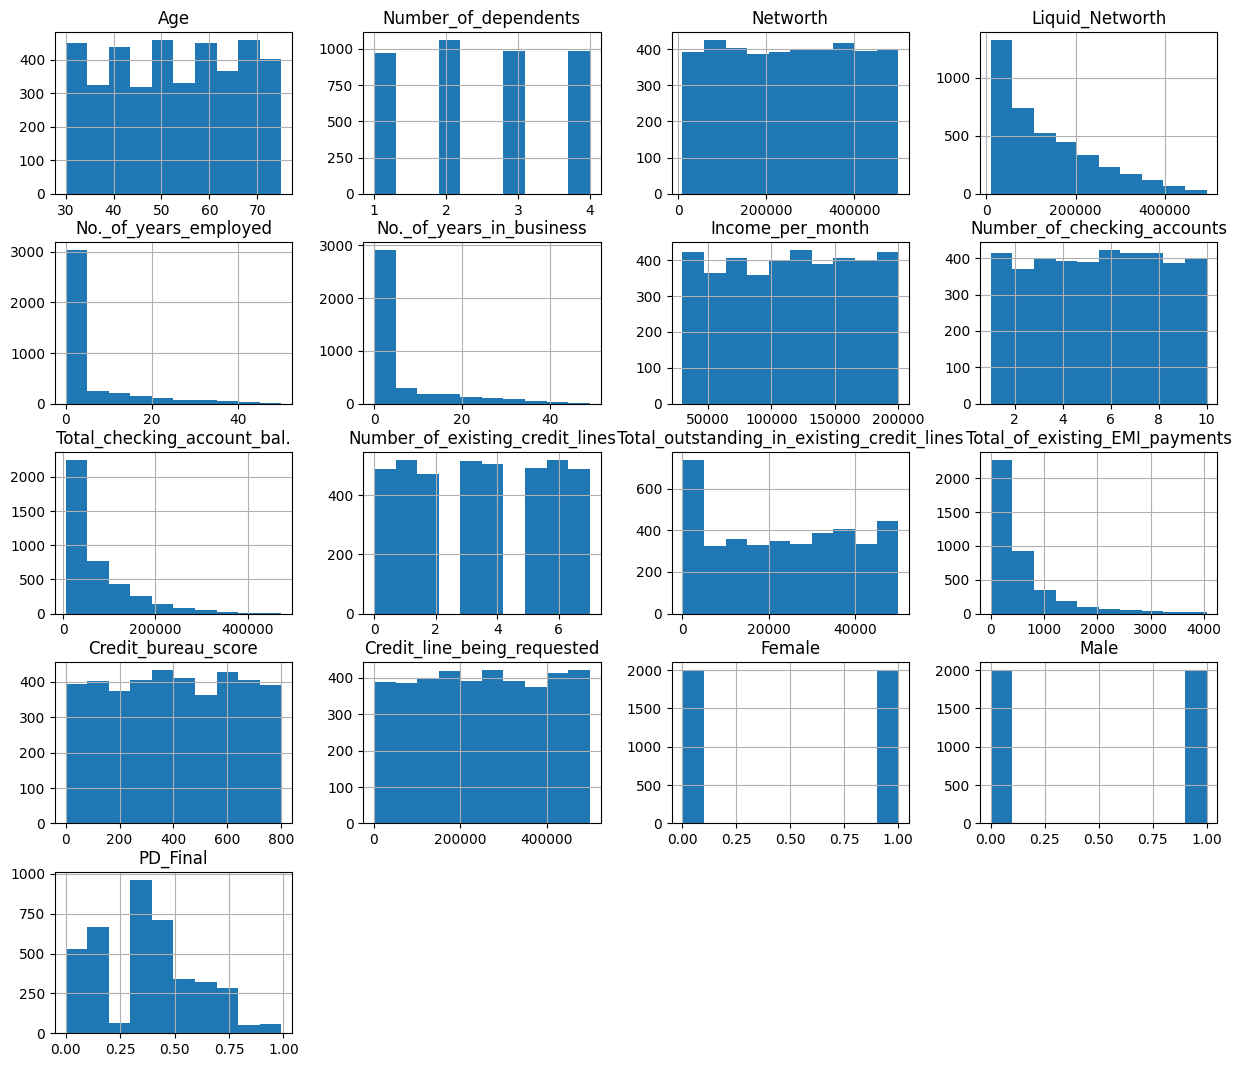

In [22]:
train_data.hist(figsize=(15,13))

<Axes: xlabel='Income_per_month', ylabel='Total_outstanding_in_existing_credit_lines'>

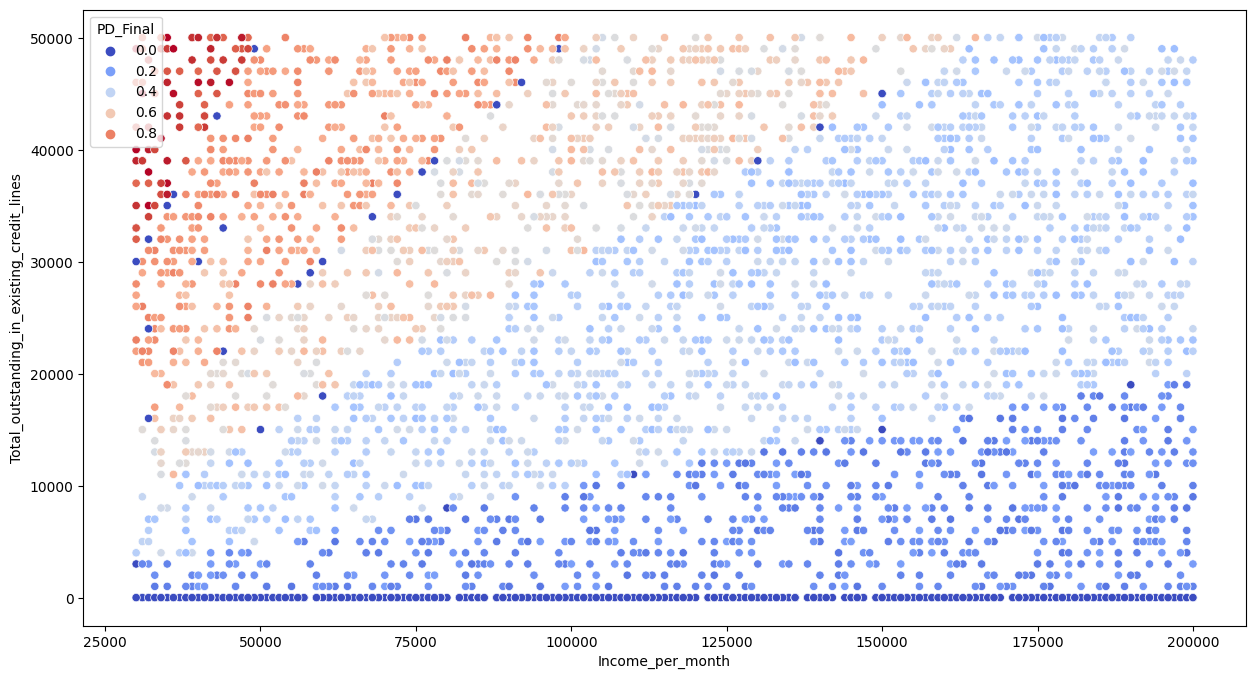

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Income_per_month', y='Total_outstanding_in_existing_credit_lines', data=train_data, hue="PD_Final", palette="coolwarm")

In [24]:
# we can improve accuracy score through feature engineering; see if corr coeff improves or not

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['PD_Final'], axis=1), train_data['PD_Final']
X_train_s = scaler.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_train_s, y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)
test_data

,Age,Number_of_dependents,Networth,Liquid_Networth,No._of_years_employed,No._of_years_in_business,Income_per_month,Number_of_checking_accounts,Total_checking_account_bal.,Number_of_existing_credit_lines,Total_outstanding_in_existing_credit_lines,Total_of_existing_EMI_payments,Credit_bureau_score,Credit_line_being_requested,Female,Male,PD_Final
4119,32,4,414000,13000,0.0,2.0,179000,10,13000,4,17000.0,270.0,716,73000,0.0,1.0,0.18
1559,33,4,164000,73000,3.0,0.0,99000,2,55000,1,39000.0,2716.0,338,417000,1.0,0.0,0.47
983,60,1,301000,22000,0.0,3.0,149000,1,16000,4,45000.0,538.0,788,82000,1.0,0.0,0.62
1952,72,4,30000,28000,0.0,0.0,107000,9,27000,1,41000.0,2527.0,547,70000,0.0,1.0,0.54
1202,54,1,254000,213000,0.0,0.0,66000,9,49000,0,0.0,0.0,49,203000,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,51,1,33000,13000,0.0,0.0,198000,5,6000,6,24000.0,311.0,111,7000,0.0,1.0,0.33
3768,42,2,481000,193000,0.0,9.0,54000,2,123000,4,25000.0,386.0,470,214000,1.0,0.0,0.46
3454,53,2,361000,71000,10.0,0.0,114000,4,29000,7,31000.0,191.0,655,397000,0.0,1.0,0.41
3653,52,3,299000,191000,0.0,0.0,200000,5,87000,2,7000.0,214.0,697,438000,0.0,1.0,0.17


In [80]:
X_test, y_test = test_data.drop(['PD_Final'], axis=1), test_data['PD_Final']
X_test_s = scaler.transform(X_test)

In [81]:
regressor.score(X_test_s, y_test)

0.7414513585426936

In [27]:
from sklearn import linear_model
count = 0
bad = 0
actual = []
predicteds = []
regr = linear_model.LinearRegression()
X = data[['Age','Number_of_dependents','Networth','Liquid_Networth',
          'No._of_years_employed','No._of_years_in_business','Income_per_month','Number_of_checking_accounts',
          'Total_checking_account_bal.','Number_of_existing_credit_lines','Total_outstanding_in_existing_credit_lines',
          'Total_of_existing_EMI_payments','Credit_bureau_score','Credit_line_being_requested','Female','Male']]
y = data['PD_Final']
regr.fit(X.values, y)
for i, j in data.iterrows():
    predicted = regr.predict([[j['Age'], j['Number_of_dependents'], j['Networth'], j['Liquid_Networth'], 
                               j['No._of_years_employed'], j['No._of_years_in_business'], j['Income_per_month'], 
                               j['Number_of_checking_accounts'], j['Total_checking_account_bal.'], 
                               j['Number_of_existing_credit_lines'], j['Total_outstanding_in_existing_credit_lines'],
                               j['Total_of_existing_EMI_payments'], 
                               j['Credit_bureau_score'], j['Credit_line_being_requested'], j['Female'], j['Male']]])
    predicteds.append(predicted)
    actual.append(j['PD_Final'])

In [98]:
import math  
import sklearn.metrics  
mse = sklearn.metrics.mean_squared_error(actual, predicteds)  
rmse = math.sqrt(mse)  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.11346728330582262


### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [86]:
forest.score(X_test_s, y_test)

0.8682143185125604

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [3,10,30],
             "max_features": [2,4,6,8]}
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
best_forest = grid_search.best_estimator_

In [90]:
best_forest.score(X_test_s, y_test)

0.86344403443048

In [ ]:
mm